# Day 2 – Multiple Linear & Polynomial Regression 

Today, we explore what happens when one input isn't enough or when the relationship isn't strictly linear.

Today, we'll see what happens when one input isn't enough or when a relationship isn't a straight line. This notebook demonstrates how to build a multiple linear regression model to use several predictors at once, and then how to use polynomial terms to capture curved patterns in the data.

## Load the Data

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load data
mission_df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")
mission_df.head()


# Drop empty values
df_copy = mission_df.dropna(subset=['mental_health_score', 'distance_to_target_km', 'payload_mass_kg']).copy()


## Part 1. Multilinear Regression (Mission Duration Prediction Example)

Goal: Predict fuel capacity based on

`distance_to_target_km`

`mission_duration_days`

These features were chosen because longer missions and farther distances are likely to require more fuel.


In [307]:
# 1. Select multiple features
features_multi = ['distance_to_target_km',
    'mission_duration_days']
X = df_copy[features_multi]
y = df_copy["fuel_capacity_kg"]

# 2. Fit the model
multi_reg = LinearRegression()
multi_reg.fit(X, y)
y_pred = multi_reg.predict(X)

# 3. Evaluate and show coefficients
    
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

print("\nCoefficients:")
for feat, coef in zip(features_multi, multi_reg.coef_):
    print(f"- {feat}: {coef:.3f}")

MSE: 9743.509
RMSE: 98.709
R² Score: 0.941

Coefficients:
- distance_to_target_km: 0.975
- mission_duration_days: 0.585


- R² of 0.941 means the model explains 94.1% of the variance in fuel capacity — a strong fit.

- Coefficients:

    `distance_to_target_km`: +0.975 → Every additional km adds ~0.98 units of fuel.

    `mission_duration_days`s: +0.585 → Longer missions also need more fuel, but to a lesser extent.

## Visualize Actual vs Predicted Mission Duration

Text(0.5, 1.0, 'Multiple Linear Regression')

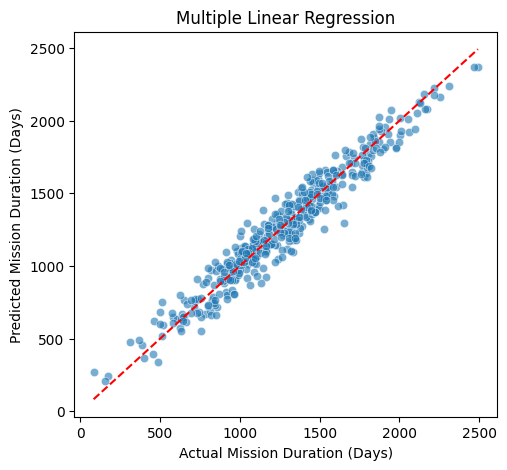

In [308]:
plt.figure(figsize=(12, 5))

# Multi-linear regression plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Mission Duration (Days)")
plt.ylabel("Predicted Mission Duration (Days)")
plt.title("Multiple Linear Regression")

## Part 2. Polynomial Regression (Mental Health & Health Impact Example)

Goal: Predict a constructed `health_impact_score` from `mental_health_score`, using a nonlinear relationship.

We simulate a "U-shaped" relationship to reflect diminishing returns or thresholds in mental well-being impact:

In [309]:
# 1. Create a "textbook" target variable 
df_copy['health_impact_score'] = (
    10 +
    80 * df_copy['mental_health_score'] +
    -60 * (df_copy['mental_health_score'] - 0.8)**2 +
    np.random.normal(loc=0, scale=3, size=len(df_copy)) # Use len(df_copy) to match size
)

df_copy['health_impact_score'] = df_copy['health_impact_score'].clip(0, 100)

# polynomial feature
x = df_copy[["mental_health_score"]].values
y_poly = df_copy["health_impact_score"]


# 2. Fit the model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

polymodel = LinearRegression()
polymodel.fit(X_poly, y_poly)
y_poly_pred = polymodel.predict(X_poly)

# 3. Evaluate and show coefficients
poly_mse = mean_squared_error(y_poly, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_poly, y_poly_pred)

print(f"Polynomial MSE: {poly_mse:.2f}")
print(f"Polynomial RMSE: {poly_rmse:.2f}")
print(f"Polynomial R² Score: {poly_r2:.2f}")

Polynomial MSE: 8.89
Polynomial RMSE: 2.98
Polynomial R² Score: 0.94


- R² of 0.94 shows strong explanatory power for a curved relationship.

- The curve captures how extreme low or high mental health scores reduce mission health impact, while moderate-high scores (around 0.8) are optimal.

## Visualize Actual vs Predicted for Polynomial Regression 

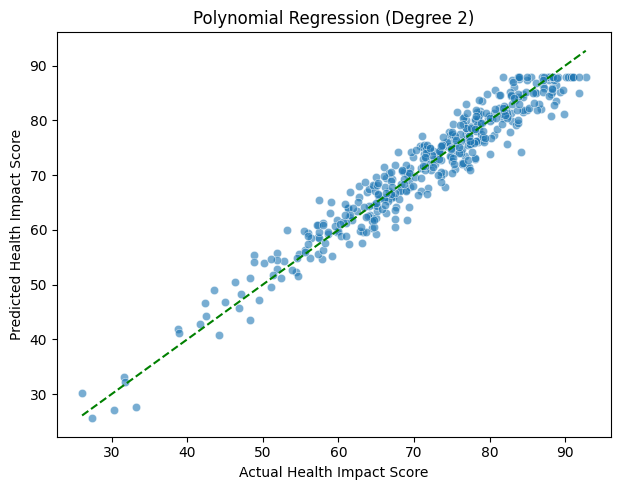

In [310]:
plt.figure(figsize=(12, 5))

# Polynomial regression plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_poly, y=y_poly_pred, alpha=0.6)
plt.plot([y_poly.min(), y_poly.max()], [y_poly.min(), y_poly.max()], 'g--')
plt.xlabel("Actual Health Impact Score")
plt.ylabel("Predicted Health Impact Score")
plt.title("Polynomial Regression (Degree 2)")

plt.tight_layout()
plt.show()

### What This Tells Us

| Model Type          | Target                | Key Insight                                          | R² Score |
| :------------------ | :-------------------- | :--------------------------------------------------- | :------- |
| **Multi-Linear** | `fuel_capacity_kg`    | Using multiple features gives a highly accurate model. | 0.941    |
| **Polynomial** | `health_impact_score` | A nonlinear relationship fits real-world patterns better. | 0.940    |


### Takeaways

- **Multiple Linear Regression** allows us to capture interactions between features. We explained over 94% of the variation in fuel needs — a major improvement over simple linear models.

- **Polynomial Regression** offers powerful flexibility when a simple line isn’t enough. The quadratic fit closely matched a simulated nonlinear relationship.

- **Low MSE and RMSE** values confirm that our models are both accurate and stable.

⚠️ **Caution:** More complexity isn’t always better. Polynomial terms can cause overfitting if not used carefully.

**Interpretability:** With linear models, coefficients are easy to interpret. With polynomial models, they’re less intuitive but still reveal useful curvature trends.

📌 Next up: **Day 3 – Feature Engineering & Multilinear Modeling Techniques**
